In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance

In [12]:
df = pd.read_csv('preci_delhi_clean.csv')
del df["Unnamed: 0"]
df.date = pd.to_datetime(df.date,format = '%Y-%m-%d')
df

,date,value
0,2000-06-01,33.405911
1,2000-06-02,0.022229
2,2000-06-03,25.713945
3,2000-06-04,11.130651
4,2000-06-05,0.006525
...,...,...
7400,2020-09-04,0.481709
7401,2020-09-05,45.213516
7402,2020-09-06,0.192533
7403,2020-09-07,23.122570


In [13]:
df2019 = df[(df.date.dt.year == 2019) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2018 = df[(df.date.dt.year == 2018) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2017 = df[(df.date.dt.year == 2017) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2016 = df[(df.date.dt.year == 2016) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2019

,date,value
6939,2019-06-01,0.000000
6940,2019-06-02,0.000197
6941,2019-06-03,0.000000
6942,2019-06-04,0.000716
6943,2019-06-05,0.108794
...,...,...
7026,2019-08-27,0.069671
7027,2019-08-28,0.058703
7028,2019-08-29,1.846856
7029,2019-08-30,0.847318


<AxesSubplot:xlabel='value', ylabel='Density'>

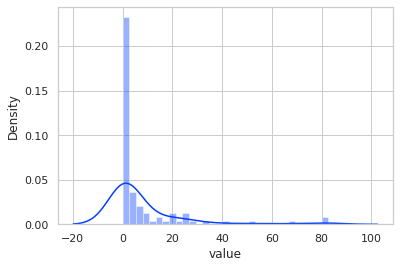

In [14]:
sns.distplot(df2019.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

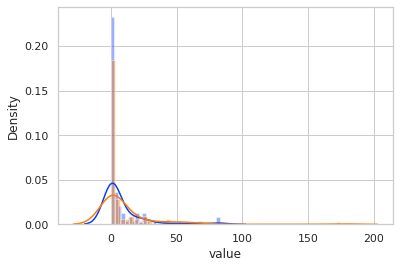

In [15]:
sns.distplot(df2019.value)
sns.distplot(df2018.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

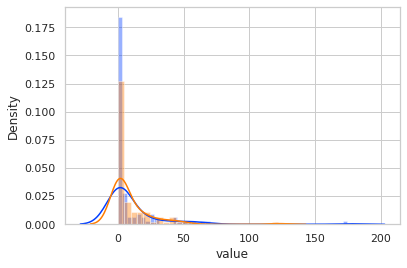

In [16]:
sns.distplot(df2018.value)
sns.distplot(df2017.value)

In [17]:
wasserstein_distance(df2019.value,df2018.value)

3.0008368833853267

In [18]:
wasserstein_distance(df2018.value,df2017.value)

2.6232444705424585

In [19]:
df19 = df[df.date.dt.year==2019]
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = x

In [20]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.997470,1.474976,1.424864,0.974886,1.693798,9.746674,8.114391,2.843369,0.463949,1.712360,0.608408
1,1.997470,0.000000,1.032696,0.934477,1.501083,1.188174,10.165283,8.533001,2.649398,2.338994,0.969448,2.375278
2,1.474976,1.032696,0.000000,0.444018,0.633043,0.453893,11.197965,9.565683,3.624084,1.434730,0.369774,1.403431
3,1.424864,0.934477,0.444018,0.000000,0.852945,0.712281,10.970825,9.338542,3.396943,1.463436,0.482363,1.445683
4,0.974886,1.501083,0.633043,0.852945,0.000000,0.999486,10.630460,8.998178,3.056579,0.936560,0.964586,0.879169
5,1.693798,1.188174,0.453893,0.712281,0.999486,0.000000,11.321691,9.689408,3.747809,1.807928,0.463265,1.813698
6,9.746674,10.165283,11.197965,10.970825,10.630460,11.321691,0.000000,2.651635,7.589952,10.004064,11.134731,10.355081
7,8.114391,8.533001,9.565683,9.338542,8.998178,9.689408,2.651635,0.000000,6.119111,8.371781,9.502448,8.722799
8,2.843369,2.649398,3.624084,3.396943,3.056579,3.747809,7.589952,6.119111,0.000000,3.307318,3.560850,3.343602
9,0.463949,2.338994,1.434730,1.463436,0.936560,1.807928,10.004064,8.371781,3.307318,0.000000,1.672919,0.351018


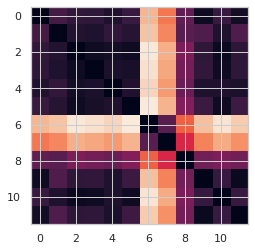

In [21]:
plt.imshow(a, interpolation='none')
plt.show()

In [22]:
df19 = df[df.date.dt.year==2019]
df20 = df[df.date.dt.year==2018]
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        dff = df19[df19.date.dt.month == i+1]
        dfj = df20[df20.date.dt.month == j+1]
        x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = x

In [23]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.943069,2.291177,2.319062,1.451246,1.693272,1.671722,17.090989,6.164101,10.539106,1.760623,1.779177,2.324097
1,1.524459,1.872559,1.900453,0.805444,1.218525,2.527255,17.509599,6.582710,11.012392,1.342013,1.345642,1.905487
2,0.491777,0.839875,0.867771,0.446931,0.373333,2.403333,18.542280,7.615392,11.982964,0.309331,0.330502,0.872806
3,0.718918,1.069197,1.094943,0.238782,0.707433,2.245905,18.315140,7.388252,11.754910,0.538993,0.560616,1.099946
4,1.059282,1.407548,1.435276,0.876236,0.928137,1.872794,17.974776,7.047887,11.414548,0.876836,0.898901,1.440310
5,0.765040,0.716134,0.744045,0.609840,0.088443,2.635015,18.666006,7.739118,12.105947,0.666987,0.629686,0.749080
6,11.689742,12.037817,12.065736,10.861319,11.373221,8.841261,7.349389,3.656681,3.823290,11.507296,11.510925,12.070771
7,10.057460,10.405535,10.433453,9.229036,9.740938,7.248170,9.039325,2.452381,5.528834,9.875014,9.878643,10.438488
8,4.115861,4.463936,4.491855,3.287437,3.799339,3.298353,14.918197,4.038516,9.439556,3.933415,3.937044,4.496889
9,1.685679,2.035232,2.061672,1.610761,1.742526,1.721894,17.348379,6.421491,10.788149,1.503233,1.541104,2.066707


In [14]:
df2019

,date,value
3438,2019-06-01,0.000
3439,2019-06-02,0.000
3440,2019-06-03,0.000
3441,2019-06-04,0.000
3442,2019-06-05,0.001
...,...,...
3525,2019-08-27,0.002
3526,2019-08-28,0.002
3527,2019-08-29,0.002
3528,2019-08-30,0.014


In [15]:
dfw = pd.DataFrame(a)
dfw = dfw / 0.014387
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.016218,0.020180,0.454114,0.674892,0.515699,0.136697,0.047086,0.044021,0.000000
1,0.000000,0.000000,0.000000,0.016218,0.020180,0.454114,0.674892,0.515699,0.136697,0.047086,0.044021,0.000000
2,0.000000,0.000000,0.000000,0.016218,0.020180,0.454114,0.674892,0.515699,0.136697,0.047086,0.044021,0.000000
3,0.025486,0.025486,0.025486,0.009268,0.018012,0.428628,0.649406,0.490213,0.111212,0.022197,0.023169,0.025486
4,0.000000,0.000000,0.000000,0.016218,0.020180,0.454114,0.674892,0.515699,0.136697,0.047086,0.044021,0.000000
5,0.488867,0.488867,0.488867,0.472649,0.468688,0.280346,0.433411,0.278402,0.352170,0.441782,0.444846,0.488867
6,0.762337,0.762337,0.762337,0.746119,0.742157,0.308223,0.105382,0.260091,0.625639,0.715251,0.718316,0.762337
7,1.000007,1.000007,1.000007,0.983788,0.979827,0.620632,0.594174,0.650229,0.863309,0.952921,0.955986,1.000007
8,0.769213,0.769213,0.769213,0.752995,0.749033,0.329001,0.241706,0.325712,0.632515,0.722127,0.725192,0.769213
9,0.455160,0.455160,0.455160,0.438942,0.434981,0.093424,0.237670,0.150225,0.318463,0.408074,0.411139,0.455160
